In [1]:
import pickle
from meanderutils import *
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.special
from numba import jit
from scipy.optimize import curve_fit
from scipy.integrate import trapezoid, cumulative_trapezoid
from scipy import interpolate
from styles import *
from functools import partial
#palette = sns.color_palette("tab10", as_cmap=True)


{'rblinkcolor': '#124984', 'rbblue': '#124984', 'rbprimarycolor': '#C43B3C', 'rbbluea': '#21114E', 'rbblueb': '#26447A', 'rbbluec': '#297393', 'rbblued': '#4EA2A4', 'rbbluee': '#9ACBBA', 'rbbluef': '#EBF3EF', 'rbrbluea': '#EEF5FC', 'rbrblueb': '#CADEF0', 'rbrbluec': '#91C3DE', 'rbrblued': '#4D99CA', 'rbrbluee': '#1C6BB0', 'rbrbluef': '#083C7D', 'rblightgray': '#D5D5D5', 'rbdarkgray': '#343434', 'rbsecondarycolor': '#91C3DE'}


In [143]:
size_data = {   4.0: [128, 512, 2048, 4096, 8192, 32768, 131072, 262144],
                1.0: [128, 256, 512,1024,2048, 4096, 8192, 16384, 32768, 65536, 131072],
                #1.0: [128, 256, 512, 1024, 2048, 4096, 8192, 16384, 32768, 65536, 131072],
                0.2: [128, 256, 512, 1024, 2048, 4096, 8192, 16384, 32768],
                0.1: [128, 512, 2048, 4096, 8192]}

In [2]:
conjectured_hausdorff_DG(central_charge(0.2))

array(3.40155263)

In [ ]:
#q = 0.1
#n = 512
sns.set_palette(sns.color_palette("tab20"))

q = 1

plt.figure(figsize=(6,3))

for n in size_data[q]:
    hist_arr = []

    # for data in SimDataIterator(q=q, n=n, name="distancemeasure"):
    #     raw_data = np.array(data["measurements"][0]["data"])


    #     hist_arr.append(np.sum(raw_data[:,0,:], axis=0))
    # hist = array_merger(hist_arr)
    # p = hist/np.sum(hist)
    with SimDistance(q=q, n=n, name="distancemeasure") as measurement:
        print("sizes:", n)
        norm = np.sum(measurement["y"])
        p = measurement["y"]/norm
        Sp = measurement["y_err"]/norm
        x = np.arange(len(p))
        plt.plot(x, p*n*2, label="n = {}".format(n))
        plt.fill_between(x=x, y1=p*n*2-Sp*2*n, y2=p*n*2+Sp*2*n, alpha=0.3)
try:
    conj_hausdorff_dim = conjectured_hausdorff(central_charge(q))
except:
    conj_hausdorff_dim = 4

r_line = np.linspace(0, 10, 100)
plt.plot(r_line, 0.2*np.power(r_line+1, conj_hausdorff_dim-1), c='green')

#plt.title("Distance histogram/dual graph distance $q = {}$".format(q))
plt.xlabel("$r$")
plt.ylabel("$N \\cdot \\rho_N(r)$")
plt.legend()
plt.grid()
plt.savefig("docs/results/assets/distanceprofile.pdf", bbox_inches='tight')

plt.show()



# $\rho$

In [ ]:
#q = 0.1
#n = 512
sns.set_palette(sns.color_palette("tab20"))

q = 1

plt.figure(figsize=(6,3))

for n in size_data[q]:
    hist_arr = []

    # for data in SimDataIterator(q=q, n=n, name="distancemeasure"):
    #     raw_data = np.array(data["measurements"][0]["data"])


    #     hist_arr.append(np.sum(raw_data[:,0,:], axis=0))
    # hist = array_merger(hist_arr)
    # p = hist/np.sum(hist)
    with SimDistance(q=q, n=n, name="distancemeasure") as measurement:
        print("sizes:", n)
        norm = np.sum(measurement["y"])
        p = measurement["y"]/norm
        Sp = measurement["y_err"]/norm
        x = np.arange(len(p))
        plt.plot(x, p, label="n = {}".format(n))
        plt.fill_between(x=x, y1=p-Sp, y2=p+Sp, alpha=0.3)
try:
    conj_hausdorff_dim = conjectured_hausdorff(central_charge(q))
except:
    conj_hausdorff_dim = 4

#r_line = np.linspace(0, 10, 100)
#plt.plot(r_line, 0.2*np.power(r_line+1, conj_hausdorff_dim-1), c='green')

#plt.title("Distance histogram/dual graph distance $q = {}$".format(q))
plt.xlabel("$r$")
plt.ylabel(r"$\rho_n(r)$")
plt.legend()
plt.grid()
plt.xlim(0,200)
plt.savefig("docs/results/assets/distanceprofilerho.pdf", bbox_inches='tight')

plt.show()



In [ ]:
#q = 0.1
#n = 512
sns.set_palette(sns.color_palette("tab20"))

q = 1

plt.figure(figsize=(6,3))

for n in size_data[q]:
    hist_arr = []

    # for data in SimDataIterator(q=q, n=n, name="distancemeasure"):
    #     raw_data = np.array(data["measurements"][0]["data"])


    #     hist_arr.append(np.sum(raw_data[:,0,:], axis=0))
    # hist = array_merger(hist_arr)
    # p = hist/np.sum(hist)
    with SimDistance(q=q, n=n, name="distancemeasure") as measurement:
        print("sizes:", n)
        norm = np.sum(measurement["y"])
        p = measurement["y"]/norm
        Sp = measurement["y_err"]/norm
        x = np.arange(len(p))
        plt.plot(x, p, label="n = {}".format(n))
        plt.fill_between(x=x, y1=p-Sp, y2=p+Sp, alpha=0.3)
try:
    conj_hausdorff_dim = conjectured_hausdorff(central_charge(q))
except:
    conj_hausdorff_dim = 4

#r_line = np.linspace(0, 10, 100)
#plt.plot(r_line, 0.2*np.power(r_line+1, conj_hausdorff_dim-1), c='green')

#plt.title("Distance histogram/dual graph distance $q = {}$".format(q))
plt.xlabel("$r$")
plt.ylabel(r"$\rho_n(r)$")
plt.legend()
plt.grid()
plt.xlim(0,200)
plt.savefig("docs/results/assets/distanceprofilerho.pdf", bbox_inches='tight')

plt.show()



In [ ]:
lst = []

for data in SimDataIterator(q=1, n=128, name="distancemeasure2"):
    #print(dir(data["measurements"][0]))
    batching_size = data["measurements"][0]["metadata"]["batching_size"]
    number_of_measurements_per_file = np.sum(data["measurements"][0]["metadata"]["n_independent"])
    metadata = metadata_creator(data).T
    #print()
    lst.append(float(metadata["measuring_percentage (%)"]))
    print(number_of_measurements_per_file)
    #metadata, batching_size, number_of_measurements_per_file

plt.plot(lst)

print(np.mean(lst))

In [ ]:
class SimDistance(object):
    def __init__(self, n, q, name):
        self.n = n
        self.q = q 
        self.name = name
      
    def __enter__(self):
        hist_arr = []
        hist_arr_sq = []
        n_measurements = 0
        #print("hello")
        for data in SimDataIterator(q=self.q, n=self.n, name="distancemeasure"):
            raw_data = np.array(data["measurements"][0]["data"])
            #print(raw_data)
            #print(np.sum(raw_data[:,0,:], axis=0))
            n_measurements += np.sum(data["measurements"][0]["metadata"]["n_independent"])
            #print(n_measurements)
            hist_arr.append(np.sum(raw_data[:,0,:], axis=0))
            hist_arr_sq.append(np.sum(raw_data[:,1,:], axis=0))
        measurement = array_merger(hist_arr)
        measurement_sq = array_merger(hist_arr_sq)
        #n_measurements = n_measurements * 4
        #plt.plot(measurement)
        #plt.show()
        #plt.plot(measurement_sq)
        #print(measurement.shape, measurement_sq.shape, n_measurements)
        y_err, y_std = calc_error(measurement, measurement_sq, n_measurements)
        #print(y_err, y_std)
        return {"raw": measurement, "raw_sq": measurement_sq, "y": measurement/n_measurements, "y_err": y_err, "y_std": y_std, "n_measurements": n_measurements}
  
    def __exit__(self, exc_type, exc_value, exc_tb):
        pass


In [ ]:
import re

def get_runs(q, n, name):
    pathdict = dict()
    paths = getsims(q, n, pre=name)

    for path in paths:
        data = re.search("sim_data_(.+)_(\d+)_(\d+).json", path).groups()
        if not data[0] in pathdict:
            pathdict[data[0]] = dict()
        (pathdict[data[0]])[int(data[1])] = path
    
    return sorted(list(pathdict.keys()))

In [ ]:
class SimDataAdvancedIterator(object):
    def __init__(self, q, n, run, name="default"):
        self.q = q
        self.n = n
        self.name = name
        self.run = run
        self.paths = getsims(self.q, self.n, pre=self.name)

        self.pathdict = dict()

        for path in self.paths:
            data = re.search("sim_data_(.+)_(\d+)_(\d+).json", path).groups()
            if not data[0] in self.pathdict:
                self.pathdict[data[0]] = dict()
            (self.pathdict[data[0]])[int(data[1])] = path

    def __iter__(self):
        return self

    def __next__(self):
        if len(self.pathdict[self.run]) == 0:
            raise StopIteration
        # print("left =", len(path))
        #print(self.pathdict[self.run].values())
        path = (self.pathdict[self.run]).popitem()[1]
        # print("left =", len(path))
        with open(path) as file:
            data = json.load(file)

        return data

In [ ]:
q = 0.2
n = 32768

len(get_runs(q=q, n=n, name="distancemeasure2"))

In [ ]:
class SimDistanceAdvanced(object):
    def __init__(self, n, q, name, run_id, index=0, combiner=1):
        self.n = n
        self.q = q
        self.index = index
        self.runs = get_runs(q=q, n=n, name=name)
        #print(self.run)
        self.name = name
        self.combiner = combiner
        self.run_id = run_id

    def get_run(self, run_id):
        return self.runs[run_id]
      
    def __enter__(self):
        hist_arr = []
        hist_arr_sq = []
        n_measurements = 0
        metadatas = []

        runs = []
        #print("hello")
        for i in range(self.combiner):
            run = self.get_run(self.combiner*self.run_id+i)
            runs.append(run)
            for data in SimDataAdvancedIterator(q=self.q, n=self.n, run=run, name=self.name):
                raw_data = np.array(data["measurements"][self.index]["data"])
                
                #print(data["measurements"][self.index]["rate"], data["measurements"][self.index]["id"])
                metadatas.append(metadata_creator(data))
                #print(raw_data)
                #print(np.sum(raw_data[:,0,:], axis=0))
                n_measurements += np.sum(data["measurements"][self.index]["metadata"]["n_independent"])
                #print(n_measurements)
                hist_arr.append(np.sum(raw_data[:,0,:], axis=0))
                hist_arr_sq.append(np.sum(raw_data[:,1,:], axis=0))
        measurement = array_merger(hist_arr)
        measurement_sq = array_merger(hist_arr_sq)

        total_time_hr = 0.0
        #n_indep = 0
        for metadata in metadatas:
            #print(metadata)
            total_time_hr += metadata.T["total_time (hr)"]
            

        
        #n_measurements = n_measurements * 4
        #plt.plot(measurement)number_of_measurements_per_file = np.sum(data["measurements"][0]["metadata"]["n_independent"])

        #plt.show()
        #plt.plot(measurement_sq)
        #print(measurement.shape, measurement_sq.shape, n_measurements)
        y_err, y_std = calc_error(measurement, measurement_sq, n_measurements)
        #print(y_err, y_std)
        return {"raw": measurement, "raw_sq": measurement_sq, "y": measurement/n_measurements, "y_err": y_err, "y_std": y_std, "n_measurements": n_measurements, "run": runs, "metadatas": metadatas, "total_time (hr)": total_time_hr}
  
    def __exit__(self, exc_type, exc_value, exc_tb):
        pass


In [ ]:
with SimDistance(q=0.1, n=8192, name="distancemeasure") as measurement:
    print(measurement)

In [ ]:
q = 1

sizes = size_data[q]



with SimDistanceAdvanced(q=q, n=sizes[-1], name="distancemeasure", run_id=0) as measurement:
    print("sizes[-1]: ", sizes[-1])
    norm = np.sum(measurement["y"])
    p = measurement["y"]/norm
    Sp = measurement["y_err"]/norm
    #print(measurement)
    print("p: ", p.shape)
    x0 = np.arange(len(p))
    plt.errorbar(x=x0, y=p, yerr=Sp)

In [ ]:
q = 1

sizes = size_data[q]



with SimDistance(q=q, n=sizes[-1], name="distancemeasure") as measurement:
    print("sizes[-1]: ", sizes[-1])
    norm = np.sum(measurement["y"])
    p = measurement["y"]/norm
    Sp = measurement["y_err"]/norm
    #print(measurement)
    print("p: ", p.shape)
    x0 = np.arange(len(p))
    plt.errorbar(x=x0, y=p, yerr=Sp)

# FUNCTION

In [ ]:
q = 1

sizes = size_data[q]

index = 0

runs = list(range(10))#[0,1,2,3, 4, 5, 6]



combiner = 9

plt.figure(figsize=(6,3))
#plt.figure(figsize=(6,3))


def get_s(combiner, runs, sizes, index, q):

    #run_id = 0
    ss = []
    ss_err = []
    results = []
    for run_id in runs:
        #with SimDistance(q=q, n=sizes[-1], name="distancemeasure") as measurement:
        #print("run_id, index, combiner", run_id, index, combiner)
        with SimDistanceAdvanced(q=q, n=sizes[-1], name="distancemeasure2", run_id=run_id, index=index, combiner=combiner) as measurement:
            
            
            norm = np.sum(measurement["y"])
            #print("sizes[-1]: ", sizes[-1], "q=", q, "area=", norm)
            p = measurement["y"]/norm
            Sp = measurement["y_err"]/norm
            #print(measurement)
            # print("p: ", p.shape)

        x0 = np.arange(len(p))
        f0 = interpolate.interp1d(x0, p, kind='linear')

        #plt.errorbar(x0, f0(x0), Sp)
        #plt.show()
        

        def hausfit(x_s, k, s, f0):
            rescale_y = 1/k
            #global f0
            try:
                val = f0(k*(x_s + s) - s)
            except:
                val = 0
            return val/rescale_y

        hausfit = partial(hausfit, f0=f0)

        ks = []


        for n in sizes:
            #with SimDistance(q=q, n=n, name="distancemeasure") as measurement:
            with SimDistanceAdvanced(q=q, n=n, name="distancemeasure2", run_id=run_id, index=index, combiner=combiner) as measurement:
                area = np.trapz(measurement["y"])
                p = measurement["y"]/area
                Sp = measurement["y_err"]/area

                max_val = np.max(p)
                #print("max_val=",max_val)
                x = np.arange(len(p))
                Sp_ = Sp[p>max_val/5]
                p_ = p[p>max_val/5]
                x_ = x[p>max_val/5]
                
                popt, pcov = curve_fit(hausfit, x_, p_, sigma=Sp_, maxfev=100000)
                err = np.sqrt(pcov.diagonal())
                k = popt[0]
                s = popt[1]
                s_err = err[1]

                ks.append(k)
                ss.append(s)
                ss_err.append(s_err)
                #print(popt, pcov)



        n_ = np.array(sizes[:-1])
        k_ = np.array(ks[:-1])

        y = np.log(sizes[-1]/n_)/np.log(k_)

        #print(y)

        results.append(y)

    #print("mean s:", np.mean(ss))


    #print(results)
    results = np.array(results)
    avgy = np.mean(results, axis=0)


    yerr = [np.sqrt(jackknife_var(row, np.mean)) for row in results.T]

    [s, s_err] = gewogen_gemiddelde(ss, ss_err)

    conj_hausdorff_dim = conjectured_hausdorff(central_charge(q))
    conj_hausdorff_dim_DG = conjectured_hausdorff_DG(central_charge(q))

    return dict(conj_hausdorff_dim=conj_hausdorff_dim, conj_hausdorff_dim_DG=conj_hausdorff_dim_DG, yerr=yerr, avgy=avgy, s=s, n_=n_)
    
def get_dual_edge(combiner, runs, q, sizes):
    dual = get_s(combiner, runs, sizes, 0, q)
    edge = get_s(combiner, runs, sizes, 1, q)
    return [dual['s'], edge['s']]

print(get_dual_edge(combiner, runs, q, sizes))

# result = get_s(combiner, runs, sizes, 1, 1)

# plt.errorbar(result['n_'], result['avgy'], yerr=result['yerr'])
# plt.hlines(result['conj_hausdorff_dim'], np.min(result['n_']), np.max(result['n_']))
# plt.hlines(result['conj_hausdorff_dim_DG'], np.min(result['n_']), np.max(result['n_']))


# print("conjectured dH =", result['conj_hausdorff_dim'])
# print("conjectured_DG dH =", result['conj_hausdorff_dim_DG'])

# plt.xscale("log")
# plt.ylabel("$d_H$")
# plt.xlabel("size $n$")
# plt.grid()

# dH_mean = np.mean(result['avgy'])

# print("average, dH", dH_mean)
# print("s=", result['s'])


# if index == 0:
#     dual_s = s
# else:
#     edge_s = s


#plt.savefig("docs/results/assets/hausdorfffit.pdf", bbox_inches='tight')


# V1

sizes[-1]:  131072
p:  (317,)
0.09601526826484018
[9.53068486] [[0.11823298]]
0.0772822945516998
[7.3105342] [[0.02817734]]
0.06346914140951528
[5.68523721] [[0.00568332]]
0.05169875636998033
[4.53959853] [[0.00206247]]
0.04251364940792911
[3.60077516] [[0.0005322]]
0.034559234548976706
[2.89004015] [[0.00017229]]
0.028739768049625376
[2.31740341] [[3.89428449e-05]]
0.023386616569936788
[1.8641016] [[1.08127772e-05]]
0.019083945257446
[1.50915166] [[3.08225668e-06]]
0.016022282340994953
[1.22687045] [[2.78573273e-07]]
0.013282604179318319
[1.0000005] [[1.77667971e-15]]
[3.07448252 3.13591382 3.19078432 3.20723594 3.24621306 3.26564834
 3.29894402 3.33897066 3.3684903  3.39002677]
popt= [3.27383936e+00 9.87461159e-01 1.35728167e-03 6.87870417e-01] err= [0.04520391 0.00733357 0.00118329 0.10197411]
sizes[-1]:  131072
p:  (367,)
0.09610827421722114
[9.47226874] [[0.11277045]]
0.0777311717646899
[7.29183389] [[0.02771404]]
0.06304598022851869
[5.67893539] [[0.00598214]]
0.05163048576134513

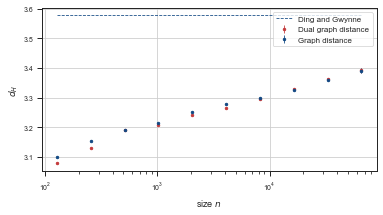

In [130]:
q = 1

sizes = size_data[q]

results_dual = []
results_edge = []
plt.figure(figsize=(6,3))

index = 0
dHs_dual = []
dHs_edge = []
combiner=9

dual_dH_fit = []
edge_dH_fit = []
dual_dH_fit_err = []
edge_dH_fit_err = []

#run_id = 0
for run_id in [0,1,2,3, 4, 5, 6, 7, 8, 9]:
    #with SimDistance(q=q, n=sizes[-1], name="distancemeasure") as measurement:
    with SimDistanceAdvanced(q=q, n=sizes[-1], name="distancemeasure2", run_id=run_id, combiner=combiner, index=index) as measurement:

        print("sizes[-1]: ", sizes[-1])
        norm = np.sum(measurement["y"])
        p = measurement["y"]/norm
        Sp = measurement["y_err"]/norm
        #print(measurement)
        print("p: ", p.shape)

    x0 = np.arange(len(p))
    f0 = interpolate.interp1d(x0, p, kind='linear')

    #plt.errorbar(x0, f0(x0), Sp)
    #plt.show()

    def hausfit(x, k):
        global f0
        try:
            val = f0(k*x)
        except:
            val = 0
        return val*k

    ks = []

    for n in sizes:
        #with SimDistance(q=q, n=n, name="distancemeasure") as measurement:
        with SimDistanceAdvanced(q=q, n=n, name="distancemeasure2", run_id=run_id, combiner=combiner, index=index) as measurement:
            area = np.trapz(measurement["y"])
            p = measurement["y"]/area
            Sp = measurement["y_err"]/area

            max_val = np.max(p)
            print(max_val)
            x = np.arange(len(p))
            Sp_ = Sp[p>max_val/5]
            p_ = p[p>max_val/5]
            x_ = x[p>max_val/5]
            
            popt, pcov = curve_fit(hausfit, x_, p_, sigma=Sp_)
            k = popt[0]

            ks.append(k)
            print(popt, pcov)



    n_ = np.array(sizes[:-1])
    k_ = np.array(ks[:-1])

    y = np.log(sizes[-1]/n_)/np.log(k_)

    print(y)

    results_dual.append(y)

    def hausfitleadorder(n, d, a, b, delta, n0):
        return np.power(n/n0, -1/d)*(a+b*(n/n0)**-delta)

    hausfitleadorder = partial(hausfitleadorder, n0=sizes[-1])


    popt, pcov = curve_fit(hausfitleadorder, sizes, ks, maxfev=100000)#, bounds=[[0, 0, -0.5, 0], [10, 5, 0.5, 40]])
    err = np.sqrt(pcov.diagonal())
    print("popt=", popt, "err=", err)
    dual_dH_fit.append(popt)
    dual_dH_fit_err.append(err)
    if err[0] < 1:
        dHs_dual.append(popt[0])

index = 1

for run_id in [0,1,2,3, 4, 5, 6, 7, 8, 9]:
    #with SimDistance(q=q, n=sizes[-1], name="distancemeasure") as measurement:
    with SimDistanceAdvanced(q=q, n=sizes[-1], name="distancemeasure2", run_id=run_id, combiner=combiner, index=index) as measurement:

        print("sizes[-1]: ", sizes[-1])
        norm = np.sum(measurement["y"])
        p = measurement["y"]/norm
        Sp = measurement["y_err"]/norm
        #print(measurement)
        print("p: ", p.shape)

    x0 = np.arange(len(p))
    f0 = interpolate.interp1d(x0, p, kind='linear')

    #plt.errorbar(x0, f0(x0), Sp)
    #plt.show()

    def hausfit(x, k):
        global f0
        try:
            val = f0(k*x)
        except:
            val = 0
        return val*k

    ks = []

    for n in sizes:
        #with SimDistance(q=q, n=n, name="distancemeasure") as measurement:
        with SimDistanceAdvanced(q=q, n=n, name="distancemeasure2", run_id=run_id, combiner=combiner, index=index) as measurement:
            area = np.trapz(measurement["y"])
            p = measurement["y"]/area
            Sp = measurement["y_err"]/area

            max_val = np.max(p)
            print(max_val)
            x = np.arange(len(p))
            Sp_ = Sp[p>max_val/5]
            p_ = p[p>max_val/5]
            x_ = x[p>max_val/5]
            
            popt, pcov = curve_fit(hausfit, x_, p_, sigma=Sp_)
            k = popt[0]

            ks.append(k)
            print(popt, pcov)



    n_ = np.array(sizes[:-1])
    k_ = np.array(ks[:-1])

    y = np.log(sizes[-1]/n_)/np.log(k_)

    print(y)

    results_edge.append(y)

    def hausfitleadorder(n, d, a, b, delta, n0):
        return np.power(n/n0, -1/d)*(a+b*(n/n0)**-delta)

    hausfitleadorder = partial(hausfitleadorder, n0=sizes[-1])


    popt, pcov = curve_fit(hausfitleadorder, sizes, ks, maxfev=100000)#, bounds=[[0, 0, -0.5, 0], [10, 5, 0.5, 40]])
    err = np.sqrt(pcov.diagonal())
    print("popt=", popt, "err=", err)
    edge_dH_fit.append(popt)
    edge_dH_fit_err.append(err)
    if err[0] < 1:
        dHs_edge.append(popt[0])




results_dual = np.array(results_dual)
avgy_dual = np.mean(results_dual, axis=0)

results_edge = np.array(results_edge)
avgy_edge = np.mean(results_edge, axis=0)

yerr_dual = [np.sqrt(jackknife_var(row, np.mean)) for row in results_dual.T]
plt.errorbar(n_, avgy_dual, yerr=yerr_dual, color=colors['rbprimarycolor'], label="Dual graph distance", fmt='.')

yerr_edge = [np.sqrt(jackknife_var(row, np.mean)) for row in results_edge.T]
plt.errorbar(n_, avgy_edge, yerr=yerr_edge, color=colors['rblinkcolor'], label="Graph distance", fmt='.')



conj_hausdorff_dim = conjectured_hausdorff(central_charge(q))
conj_hausdorff_dim_DG = conjectured_hausdorff_DG(central_charge(q))


print(dHs_edge, dHs_dual)

dHs_edge = np.array(dHs_edge)
dHs_dual = np.array(dHs_dual)



plt.hlines(conj_hausdorff_dim_DG, np.min(n_), np.max(n_), color=colors['rblinkcolor'], linestyle='--', label="Ding and Gwynne")
print("conjectured dH =", conj_hausdorff_dim_DG)
#plt.title("" + "$d_H$ (conjectured)" + "= ${}$".format(conj_hausdorff_dim))
plt.xscale("log")
plt.ylabel("$d_H$")
plt.xlabel("size $n$")
plt.grid()
plt.legend()

dH_mean = np.mean(y)

print("average, dH", dH_mean)

dHs_dual_err = np.sqrt(jackknife_var(dHs_dual, np.mean))
dHs_edge_err = np.sqrt(jackknife_var(dHs_edge, np.mean))

print(errornumtostr([np.mean(dHs_edge), dHs_edge_err]), errornumtostr([np.mean(dHs_dual), dHs_dual_err]))


plt.savefig("docs/results/assets/hausdorfffit.pdf", bbox_inches='tight')


<Figure size 432x288 with 0 Axes>

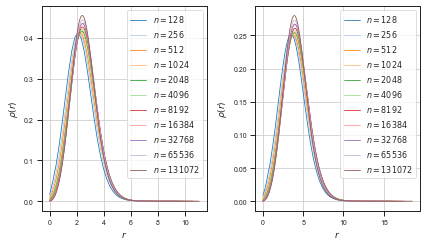

In [116]:
def rescale_haus(y, N, dH, x=None):
    if not x:
        x = np.arange(len(y))
    return [x*(N**(-1/dH)), y*(N**(1/dH))]

sns.set_palette(sns.color_palette("tab20"))

plt.figure(figsize=(6,4))

q = 1
dH = np.mean(dHs_dual)

index = 0

#sizes = size_data[q]
sizes = [128, 256, 512,1024,2048,4096, 8192,16384, 32768, 65536, 131072]

fig, [ax1, ax2] = plt.subplots(ncols=2, figsize=(6,3.5))

for n in sizes:
    with SimDistanceAdvanced(q=q, n=n, name="distancemeasure2", run_id=0, combiner=9*10, index=index) as measurement:
        area = np.trapz(measurement["y"])
        p = measurement["y"]/area
        Sp = measurement["y_err"]/area
        #Sp = measurement["y"]/np.trapz(measurement["y"])        
        ax1.plot(*rescale_haus(y=p, N=n, dH=dH), label="$n = {}$".format(n))

    ax1.legend()
    #plt.title("Distance histogram/dual graph distance")
    ax1.grid()
    ax1.set_xlabel("$r$")
    ax1.set_ylabel(r"$\rho(r)$")
plt.tight_layout()
#plt.savefig("docs/results/assets/finitesizescaledversionwithoutsdual.pdf", bbox_inches='tight')
print()

def rescale_haus(y, N, dH, x=None):
    if not x:
        x = np.arange(len(y))
    return [x*(N**(-1/dH)), y*(N**(1/dH))]

sns.set_palette(sns.color_palette("tab20"))

#plt.figure(figsize=(6,4))

q = 1
dH = np.mean(dHs_edge)

index = 1

#sizes = size_data[q]
sizes = [128, 256, 512,1024,2048,4096, 8192,16384, 32768, 65536, 131072]

#plt.figure(figsize=(3,3.5))

for n in sizes:
    with SimDistanceAdvanced(q=q, n=n, name="distancemeasure2", run_id=0, combiner=9*10, index=index) as measurement:
        area = np.trapz(measurement["y"])
        p = measurement["y"]/area
        Sp = measurement["y_err"]/area
        #Sp = measurement["y"]/np.trapz(measurement["y"])        
        ax2.plot(*rescale_haus(y=p, N=n, dH=dH), label="$n = {}$".format(n))

    ax2.legend()
    #plt.title("Distance histogram/dual graph distance")
    ax2.grid()
    ax2.set_xlabel("$r$")
    ax2.set_ylabel(r"$\rho(r)$")

plt.tight_layout()
fig.savefig("docs/results/assets/finitesizescaledversionwithoutsgraphdualgraph.pdf", bbox_inches='tight')
plt.show()

<Figure size 432x288 with 0 Axes>

In [110]:
data = np.array(["$" + errornumtostr(arr) + "$" for comb in list(zip(dual_dH_fit, dual_dH_fit_err)) for arr in zip(*comb)]).reshape(10, 4)

dfout = pd.DataFrame({'$d_H$': data[:, 0], '$a$': data[:, 1], '$b$': data[:,2], '$\delta$': data[:,3]})

style = dfout.style.hide(axis="index")
style = style.set_table_styles([
    {'selector': 'toprule', 'props': ':hline;'},
    #{'selector': 'midrule', 'props': ':hline;'},
    {'selector': 'bottomrule', 'props': ':hline;'}
], overwrite=False).applymap_index(
    lambda v: "font-weight: bold;", axis="columns"
)
#column_format="rrrrr")
print(style.to_latex(column_format="|c|c|c|c|", convert_css=True))
style

\begin{tabular}{|c|c|c|c|}
\hline
\bfseries $d_H$ & \bfseries $a$ & \bfseries $b$ & $\delta$ \\
$3.27 \pm 0.05$ & $0.987 \pm 0.007$ & $0.0014 \pm 0.0012$ & $0.69 \pm 0.10$ \\
$3.28 \pm 0.04$ & $0.988 \pm 0.006$ & $0.0017 \pm 0.0014$ & $0.65 \pm 0.09$ \\
$3.28 \pm 0.04$ & $0.989 \pm 0.006$ & $0.0015 \pm 0.0011$ & $0.68 \pm 0.09$ \\
$3.32 \pm 0.09$ & $0.990 \pm 0.009$ & $0.004 \pm 0.005$ & $0.55 \pm 0.13$ \\
$3.35 \pm 0.09$ & $0.987 \pm 0.007$ & $0.007 \pm 0.007$ & $0.49 \pm 0.11$ \\
$3.44 \pm 0.15$ & $0.981 \pm 0.015$ & $0.018 \pm 0.021$ & $0.39 \pm 0.10$ \\
$3.33 \pm 0.09$ & $0.990 \pm 0.010$ & $0.003 \pm 0.004$ & $0.58 \pm 0.13$ \\
$3.30 \pm 0.06$ & $0.989 \pm 0.006$ & $0.0038 \pm 0.0031$ & $0.57 \pm 0.09$ \\
$3.37 \pm 0.12$ & $0.989 \pm 0.009$ & $0.009 \pm 0.011$ & $0.47 \pm 0.12$ \\
$3.36 \pm 0.13$ & $0.987 \pm 0.010$ & $0.008 \pm 0.011$ & $0.48 \pm 0.15$ \\
\hline
\end{tabular}



In [111]:
data = np.array(["$" + errornumtostr(arr) + "$" for comb in list(zip(edge_dH_fit, edge_dH_fit_err)) for arr in zip(*comb)]).reshape(10, 4)

dfout = pd.DataFrame({'$d_H$': data[:, 0], '$a$': data[:, 1], '$b$': data[:,2], '$\delta$': data[:,3]})

style = dfout.style.hide(axis="index")
style = style.set_table_styles([
    {'selector': 'toprule', 'props': ':hline;'},
    #{'selector': 'midrule', 'props': ':hline;'},
    {'selector': 'bottomrule', 'props': ':hline;'}
], overwrite=False).applymap_index(
    lambda v: "font-weight: bold;", axis="columns"
)
#column_format="rrrrr")
print(style.to_latex(column_format="|c|c|c|c|", convert_css=True))
style

\begin{tabular}{|c|c|c|c|}
\hline
\bfseries $d_H$ & \bfseries $a$ & \bfseries $b$ & $\delta$ \\
$3.38 \pm 0.05$ & $0.9855 \pm 0.0035$ & $0.010 \pm 0.005$ & $0.44 \pm 0.05$ \\
$3.27 \pm 0.05$ & $0.986 \pm 0.007$ & $0.0018 \pm 0.0018$ & $0.63 \pm 0.12$ \\
$3.27 \pm 0.04$ & $0.986 \pm 0.007$ & $0.0013 \pm 0.0012$ & $0.67 \pm 0.11$ \\
$3.27 \pm 0.04$ & $0.987 \pm 0.006$ & $0.0016 \pm 0.0013$ & $0.65 \pm 0.09$ \\
$3.25 \pm 0.05$ & $0.984 \pm 0.008$ & $0.0011 \pm 0.0013$ & $0.69 \pm 0.14$ \\
$3.31 \pm 0.05$ & $0.988 \pm 0.005$ & $0.0039 \pm 0.0034$ & $0.54 \pm 0.09$ \\
$3.30 \pm 0.04$ & $0.988 \pm 0.006$ & $0.0022 \pm 0.0018$ & $0.61 \pm 0.09$ \\
$3.29 \pm 0.05$ & $0.987 \pm 0.005$ & $0.0033 \pm 0.0026$ & $0.56 \pm 0.09$ \\
$3.30 \pm 0.05$ & $0.989 \pm 0.005$ & $0.0031 \pm 0.0023$ & $0.57 \pm 0.08$ \\
$3.26 \pm 0.04$ & $0.985 \pm 0.006$ & $0.0008 \pm 0.0008$ & $0.72 \pm 0.11$ \\
\hline
\end{tabular}



# Statistics

In [ ]:
q = 1

sizes = size_data[q]

index = 0

runs = list(range(10))

combiner = 9

total_time = 0.0


for run_id in runs:
    for n in sizes:
        with SimDistanceAdvanced(q=q, n=n, name="distancemeasure2", run_id=run_id, index=index, combiner=combiner) as measurement:
            total_time += measurement["total_time (hr)"]

print(total_time/24/365)


# Statistics $q = 0.2$

## Get runs

In [141]:
q = 0.2
n = 32768

len(get_runs(q=q, n=n, name="distancemeasure2"))

18

In [145]:
q = 0.2

sizes = size_data[q]

index = 0

runs = list(range(5))

combiner = 2

total_time = 0.0



for run_id in runs:
    for n in sizes:
        with SimDistanceAdvanced(q=q, n=n, name="distancemeasure2", run_id=run_id, index=index, combiner=combiner) as measurement:
            total_time += measurement["total_time (hr)"]

print(total_time/24)

0    22.342219
Name: total_time (hr), dtype: float64


In [149]:
n_indep = 0

index = 0

q = 0.2

n= 512
runs = list(range(9))

combiner = 2
run_id = 0

with SimDistanceAdvanced(q=q, n=n, name="distancemeasure2", run_id=run_id, index=index, combiner=combiner) as measurement:
    n_indep += measurement["n_measurements"]

    

print(n_indep, "indepent measurements in", len(runs), "runs", )



256 indepent measurements in 9 runs


In [150]:
n_indep = 0

index = 0

q = 0.2

n= 512
runs = list(range(10))

combiner = 9
run_id = 0

with SimDistanceAdvanced(q=q, n=n, name="distancemeasure2", run_id=run_id, index=index, combiner=combiner) as measurement:
    n_indep += measurement["n_measurements"]

    

print(n_indep, "indepent measurements in", len(runs), "runs", )



1152 indepent measurements in 10 runs


# V2

In [ ]:
q = 1

sizes = size_data[q]

index = 1

runs = list(range(10))#[0,1,2,3, 4, 5, 6]

results = []

combiner = 9

plt.figure(figsize=(6,3))


#run_id = 0
ss = []
for run_id in runs:
    print("run_id, index, combiner", run_id, index, combiner)

    #with SimDistance(q=q, n=sizes[-1], name="distancemeasure") as measurement:
    with SimDistanceAdvanced(q=q, n=sizes[-1], name="distancemeasure2", run_id=run_id, index=index, combiner=combiner) as measurement:

        norm = np.sum(measurement["y"])
        print("sizes[-1]: ", sizes[-1], "q=", q, "area=", norm)

        p = measurement["y"]/norm
        Sp = measurement["y_err"]/norm
        #print(measurement)
        # print("p: ", p.shape)

    x0 = np.arange(len(p))
    f0 = interpolate.interp1d(x0, p, kind='linear')

    #plt.errorbar(x0, f0(x0), Sp)
    #plt.show()

    def hausfit(x_s, k, s):
        rescale_y = 1/k
        global f0
        try:
            val = f0(k*(x_s + s) - s)
        except:
            val = 0
        return val/rescale_y

    ks = []


    for n in sizes:
        #with SimDistance(q=q, n=n, name="distancemeasure") as measurement:
        with SimDistanceAdvanced(q=q, n=n, name="distancemeasure2", run_id=run_id, index=index, combiner=combiner) as measurement:
            area = np.trapz(measurement["y"])
            p = measurement["y"]/area
            Sp = measurement["y_err"]/area

            max_val = np.max(p)
            print("max_val=",max_val)

            x = np.arange(len(p))
            Sp_ = Sp[p>max_val/5]
            p_ = p[p>max_val/5]
            x_ = x[p>max_val/5]
            
            popt, pcov = curve_fit(hausfit, x_, p_, sigma=Sp_, maxfev=100000)
            k = popt[0]
            s = popt[1]

            ks.append(k)
            ss.append(s)
            print(popt, pcov)



    n_ = np.array(sizes[:-1])
    k_ = np.array(ks[:-1])

    y = np.log(sizes[-1]/n_)/np.log(k_)

    #print(y)

    results.append(y)

print("mean s:", np.mean(ss))
print(results)

results = np.array(results)
avgy = np.mean(results, axis=0)



yerr = [np.sqrt(jackknife_var(row, np.mean)) for row in results.T]
plt.errorbar(n_, avgy, yerr=yerr)


conj_hausdorff_dim = conjectured_hausdorff(central_charge(q))
conj_hausdorff_dim_DG = conjectured_hausdorff_DG(central_charge(q))



plt.hlines(conj_hausdorff_dim, np.min(n_), np.max(n_))
plt.hlines(conj_hausdorff_dim_DG, np.min(n_), np.max(n_))

print("conjectured dH =", conj_hausdorff_dim)
print("conjectured_DG dH =", conj_hausdorff_dim_DG)




#plt.title("" + "$d_H$ (conjectured)" + "= ${}$".format(conj_hausdorff_dim))
plt.xscale("log")
plt.ylabel("$d_H$")
plt.xlabel("size $n$")
plt.grid()

dH_mean = np.mean(y)

print("average, dH", dH_mean)

s = np.mean(ss)

if index == 0:
    dual_s = s
else:
    edge_s = s


#plt.savefig("docs/results/assets/hausdorfffit.pdf", bbox_inches='tight')


In [ ]:
%config InlineBackend.figure_formats = ['svg']
sns.set_palette(sns.color_palette("tab20"))
for run_id in [0, 1, 2, 3, 4]:
    with SimDistanceAdvanced(q=1, n=131072, name="distancemeasure2", run_id=run_id, index=1, combiner=combiner) as measurement:
        norm = np.sum(measurement["y"])
        p = measurement["y"]/norm
        Sp = measurement["y_err"]/norm
        x0 = np.arange(len(p))
        
        print(measurement["metadatas"][0])
        # metadata_creator()
        
        plt.plot(x0, p, label="{}".format(measurement["run"]))
        plt.fill_between(x=x0, y1=p-Sp, y2=p+Sp, alpha=0.3)

plt.legend()

# V2 finish

In [ ]:
q = 1


sizes = size_data[q]

results = []
dHs = []
plt.figure(figsize=(6,3))

#run_id = 0
for run_id in runs:
    #with SimDistance(q=q, n=sizes[-1], name="distancemeasure") as measurement:
    with SimDistanceAdvanced(q=q, n=sizes[-1], name="distancemeasure2", run_id=run_id, index=index) as measurement:

        print("sizes[-1]: ", sizes[-1])
        norm = np.sum(measurement["y"])
        p = measurement["y"]/norm
        Sp = measurement["y_err"]/norm
        #print(measurement)
        print("p: ", p.shape)

    x0 = np.arange(len(p))
    f0 = interpolate.interp1d(x0, p, kind='linear')

    #plt.errorbar(x0, f0(x0), Sp)
    #plt.show()

    def hausfit(x_s, k):
        rescale_y = 1/k
        global s
        global f0
        try:
            val = f0(k*(x_s + s) - s)
        except:
            val = 0
        return val/rescale_y

    ks = []
    ks_err = []
    #ss = []

    for n in sizes:
        #with SimDistance(q=q, n=n, name="distancemeasure") as measurement:
        with SimDistanceAdvanced(q=q, n=n, name="distancemeasure2", run_id=run_id, index=index) as measurement:
            area = np.trapz(measurement["y"])
            p = measurement["y"]/area
            Sp = measurement["y_err"]/area

            max_val = np.max(p)
            print(max_val)
            x = np.arange(len(p))
            Sp_ = Sp[p>max_val/5]
            p_ = p[p>max_val/5]
            x_ = x[p>max_val/5]
            
            popt, pcov = curve_fit(hausfit, x_, p_, sigma=Sp_, maxfev=100000)
            k = popt[0]
            ks_e = np.sqrt(pcov.diagonal())
            #s = popt[1]

            ks.append(k)
            ks_err.append(ks_e[0])
            #ss.append(s)
            #print("popt=", popt, "pcov", pcov)



    n_ = np.array(sizes[:-1])
    n0 = sizes[-1]
    k_ = np.array(ks[:-1])

    y = np.log(n0/n_)/np.log(k_/ks[-1])
    print(y)

    results.append(y)

    def hausfitleadorder(n, d, a, b, delta, n0):
        return np.power(n/n0, -1/d)*(a+b*(n/n0)**-delta)

    hausfitleadorder = partial(hausfitleadorder, n0=n0)


    popt, pcov = curve_fit(hausfitleadorder, sizes, ks, maxfev=100000)#, bounds=[[0, 0, -0.5, 0], [10, 5, 0.5, 40]])
    err = np.sqrt(pcov.diagonal())
    print("popt=", popt, "err=", err)
    if err[0] < 1:
        dHs.append(popt[0])

    sizes = np.array(sizes)
    
    #plt.errorbar(sizes, ks, yerr=ks_err, color='green', marker='.')
    #plt.plot(sizes, hausfitleadorder(sizes, *popt), color='red')
    #plt.xscale("log")
    #plt.show()
    
    #print("result", result)





print("mean s:", np.mean(ss))

results = np.array(results)
avgy = np.mean(results, axis=0)


yerr = [np.sqrt(jackknife_var(row, np.mean)) for row in results.T]
plt.errorbar(n_, avgy, yerr=yerr)


conj_hausdorff_dim = conjectured_hausdorff(central_charge(q))
conj_hausdorff_dim_DG = conjectured_hausdorff_DG(central_charge(q))



plt.hlines(conj_hausdorff_dim, np.min(n_), np.max(n_))
plt.hlines(conj_hausdorff_dim_DG, np.min(n_), np.max(n_))

print("conjectured dH =", conj_hausdorff_dim)
print("conjectured_DG dH =", conj_hausdorff_dim_DG)
#plt.title("" + "$d_H$ (conjectured)" + "= ${}$".format(conj_hausdorff_dim))
plt.xscale("log")
plt.ylabel("$d_H$")
plt.xlabel("size $n$")
plt.grid()

dH_mean = np.mean(y)

print("average, dH", dH_mean)


#plt.savefig("docs/results/assets/hausdorfffit.pdf", bbox_inches='tight')


In [ ]:
dHs

In [ ]:
q = 1


sizes = size_data[q]

results = []
results_sizes = []
results_k = []
plt.figure(figsize=(6,3))

#run_id = 0
for run_id in runs:
    #with SimDistance(q=q, n=sizes[-1], name="distancemeasure") as measurement:
    with SimDistanceAdvanced(q=q, n=sizes[-1], name="distancemeasure2", run_id=run_id, index=index) as measurement:

        print("sizes[-1]: ", sizes[-1])
        norm = np.sum(measurement["y"])
        p = measurement["y"]/norm
        Sp = measurement["y_err"]/norm
        #print(measurement)
        print("p: ", p.shape)

    x0 = np.arange(len(p))
    f0 = interpolate.interp1d(x0, p, kind='linear')

    #plt.errorbar(x0, f0(x0), Sp)
    #plt.show()

    def hausfit(x_s, k):
        rescale_y = 1/k
        global s
        global f0
        try:
            val = f0(k*(x_s + s) - s)
        except:
            val = 0
        return val/rescale_y

    ks = []
    #ss = []

    for n in sizes:
        #with SimDistance(q=q, n=n, name="distancemeasure") as measurement:
        with SimDistanceAdvanced(q=q, n=n, name="distancemeasure2", run_id=run_id, index=index) as measurement:
            area = np.trapz(measurement["y"])
            p = measurement["y"]/area
            Sp = measurement["y_err"]/area

            max_val = np.max(p)
            print(max_val)
            x = np.arange(len(p))
            Sp_ = Sp[p>max_val/5]
            p_ = p[p>max_val/5]
            x_ = x[p>max_val/5]
            
            popt, pcov = curve_fit(hausfit, x_, p_, sigma=Sp_, maxfev=100000)
            k = popt[0]
            #s = popt[1]

            ks.append(k)
            #ss.append(s)
            print(popt, pcov)



    n_ = np.array(sizes[:-1])
    n0 = sizes[-1]
    k_ = np.array(ks[:-1])

    y = np.log(n0/n_)/np.log(k_/ks[-1])
    print(y)

    results.append(y)
    results_sizes.append(sizes)
    results_k.append(ks)

    def hausfitleadorder(n, d, a, b, delta, n0):
        return np.power(n/n0, -1/d)*(a+b*(n/n0)**-delta)

    hausfitleadorder = partial(hausfitleadorder, n0=n0)

    popt, pcov = curve_fit(hausfitleadorder, sizes, ks, maxfev=100000)

    sizes = np.array(sizes)
    
    plt.plot(sizes, ks, color='green', marker='.')
    plt.plot(sizes, hausfitleadorder(sizes, *popt), color='red')
    plt.xscale("log")
    plt.show()
    #print("result", result)





print("mean s:", np.mean(ss))

results = np.array(results)
avgy = np.mean(results, axis=0)


yerr = [np.sqrt(jackknife_var(row, np.mean)) for row in results.T]
plt.errorbar(n_, avgy, yerr=yerr)


conj_hausdorff_dim = conjectured_hausdorff(central_charge(q))
conj_hausdorff_dim_DG = conjectured_hausdorff_DG(central_charge(q))



plt.hlines(conj_hausdorff_dim, np.min(n_), np.max(n_))
plt.hlines(conj_hausdorff_dim_DG, np.min(n_), np.max(n_))

print("conjectured dH =", conj_hausdorff_dim)
print("conjectured_DG dH =", conj_hausdorff_dim_DG)
#plt.title("" + "$d_H$ (conjectured)" + "= ${}$".format(conj_hausdorff_dim))
plt.xscale("log")
plt.ylabel("$d_H$")
plt.xlabel("size $n$")
plt.grid()

dH_mean = np.mean(y)

print("average, dH", dH_mean)

#plt.savefig("docs/results/assets/hausdorfffit.pdf", bbox_inches='tight')


# V3

[dual_s, edge_s] [3.2967782600856674, 5.229313777828996]
s = 3.2967782600856674
sizes[-1]:  131072
p:  (317,)
0.09826015166340508
[7.09348826] [[0.00395527]]
0.0762043316226784
[5.78233948] [[0.00081133]]
0.06315644846116268
[4.76137583] [[0.00044062]]
0.05142454117063492
[3.93728935] [[0.0001165]]
0.04229257197304969
[3.22963513] [[6.35936324e-05]]
0.03542658473985038
[2.65928627] [[5.45858243e-05]]
0.029465235319762452
[2.18691076] [[2.61113629e-05]]
0.023285039469680444
[1.79623155] [[6.31850229e-06]]
0.019541587410200446
[1.47906734] [[6.35786653e-06]]
0.015714878326413804
[1.21686387] [[1.22040657e-06]]
0.012200139555304367
[1.00000053] [[7.82923916e-16]]
[3.53795136 3.55499021 3.55337972 3.54035658 3.54741926 3.54348988
 3.54329236 3.5504111  3.54178527 3.53148482]
popt= [3.56101128e+00 1.00403389e+00 3.93439017e-49 1.53959167e+01] err= [7.81664843e-03 2.78234387e-03 2.08810730e-43 7.56734589e+04]
sizes[-1]:  131072
p:  (281,)
0.09667013209393346
[7.03315824] [[0.00161691]]
0.077

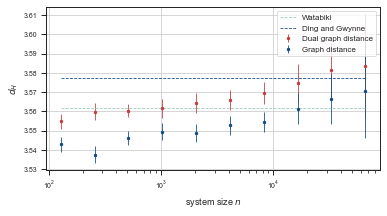

In [118]:
q = 1

sizes = size_data[q]

index = 1

runs = list(range(10))#[0,1,2,3, 4, 5, 6]

results = []

combiner = 9

results_dual = []
results_edge = []

plt.figure(figsize=(6,3))

[dual_s, edge_s] = get_dual_edge(combiner, runs, q, sizes)

print("[dual_s, edge_s]", [dual_s, edge_s])

dHs_dual = []
dHs_edge = []
dHs_dual_errs = []
dHs_edge_errs = []

dual_dH_fit = []
edge_dH_fit = []
dual_dH_fit_err = []
edge_dH_fit_err = []

dual_dH_fit2 = []
edge_dH_fit2 = []


index = 0
s = dual_s
print('s =', s)
#run_id = 0
for run_id in runs:
    #with SimDistance(q=q, n=sizes[-1], name="distancemeasure") as measurement:
    with SimDistanceAdvanced(q=q, n=sizes[-1], name="distancemeasure2", run_id=run_id, index=index) as measurement:

        print("sizes[-1]: ", sizes[-1])
        norm = np.sum(measurement["y"])
        p = measurement["y"]/norm
        Sp = measurement["y_err"]/norm
        #print(measurement)
        print("p: ", p.shape)

    x0 = np.arange(len(p))
    f0 = interpolate.interp1d(x0, p, kind='linear')

    #plt.errorbar(x0, f0(x0), Sp)
    #plt.show()

    def hausfit(x_s, k):
        rescale_y = 1/k
        global s
        global f0
        try:
            val = f0(k*(x_s + s) - s)
        except:
            val = 0
        return val/rescale_y

    ks = []
    #ss = []

    for n in sizes:
        #with SimDistance(q=q, n=n, name="distancemeasure") as measurement:
        with SimDistanceAdvanced(q=q, n=n, name="distancemeasure2", run_id=run_id, index=index) as measurement:
            area = np.trapz(measurement["y"])
            p = measurement["y"]/area
            Sp = measurement["y_err"]/area

            max_val = np.max(p)
            print(max_val)
            x = np.arange(len(p))
            Sp_ = Sp[p>max_val/5]
            p_ = p[p>max_val/5]
            x_ = x[p>max_val/5]
            
            popt, pcov = curve_fit(hausfit, x_, p_, sigma=Sp_, maxfev=100000)
            k = popt[0]
            #s = popt[1]

            ks.append(k)
            #ss.append(s)
            print(popt, pcov)



    n_ = np.array(sizes[:-1])
    k_ = np.array(ks[:-1])

    y = np.log(sizes[-1]/n_)/np.log(k_/ks[-1])

    print(y)

    results_dual.append(y)

    def hausfitleadorder(n, d, a, b, delta, n0):
        return np.power(n/n0, -1/d)*(a+b*(n/n0)**-delta)

    hausfitleadorder = partial(hausfitleadorder, n0=n0)


    popt, pcov = curve_fit(hausfitleadorder, sizes, ks, maxfev=100000)#, bounds=[[0, 0, -0.5, 0], [10, 5, 0.5, 40]])
    err = np.sqrt(pcov.diagonal())
    print("popt=", popt, "err=", err)
    dual_dH_fit.append(popt)
    dual_dH_fit_err.append(err)
    if err[0] < 1:
        dHs_dual.append(popt[0])
        dual_dH_fit2.append(popt)
        
        dHs_dual_errs.append(err[0])
    else:
        print("fail fit")


index = 1
s = edge_s
print('s =', s)
#run_id = 0
for run_id in runs:
    #with SimDistance(q=q, n=sizes[-1], name="distancemeasure") as measurement:
    with SimDistanceAdvanced(q=q, n=sizes[-1], name="distancemeasure2", run_id=run_id, index=index) as measurement:

        print("sizes[-1]: ", sizes[-1])
        norm = np.sum(measurement["y"])
        p = measurement["y"]/norm
        Sp = measurement["y_err"]/norm
        #print(measurement)
        print("p: ", p.shape)

    x0 = np.arange(len(p))
    f0 = interpolate.interp1d(x0, p, kind='linear')

    #plt.errorbar(x0, f0(x0), Sp)
    #plt.show()

    def hausfit(x_s, k):
        rescale_y = 1/k
        global s
        global f0
        try:
            val = f0(k*(x_s + s) - s)
        except:
            val = 0
        return val/rescale_y

    ks = []
    #ss = []

    for n in sizes:
        #with SimDistance(q=q, n=n, name="distancemeasure") as measurement:
        with SimDistanceAdvanced(q=q, n=n, name="distancemeasure2", run_id=run_id, index=index) as measurement:
            area = np.trapz(measurement["y"])
            p = measurement["y"]/area
            Sp = measurement["y_err"]/area

            max_val = np.max(p)
            print(max_val)
            x = np.arange(len(p))
            Sp_ = Sp[p>max_val/5]
            p_ = p[p>max_val/5]
            x_ = x[p>max_val/5]
            
            popt, pcov = curve_fit(hausfit, x_, p_, sigma=Sp_, maxfev=100000)
            k = popt[0]
            #s = popt[1]

            ks.append(k)
            #ss.append(s)
            print(popt, pcov)



    n_ = np.array(sizes[:-1])
    k_ = np.array(ks[:-1])

    y = np.log(sizes[-1]/n_)/np.log(k_/ks[-1])

    print(y)

    results_edge.append(y)

    def hausfitleadorder(n, d, a, b, delta, n0):
        return np.power(n/n0, -1/d)*(a+b*(n/n0)**-delta)

    hausfitleadorder = partial(hausfitleadorder, n0=n0)


    popt, pcov = curve_fit(hausfitleadorder, sizes, ks, maxfev=100000)#, bounds=[[0, 0, -0.5, 0], [10, 5, 0.5, 40]])
    err = np.sqrt(pcov.diagonal())
    print("popt=", popt, "err=", err)
    edge_dH_fit.append(popt)
    edge_dH_fit_err.append(err)
    if err[0] < 1:
        dHs_edge.append(popt[0])
        edge_dH_fit2.append(popt)
        
        dHs_edge_errs.append(err[0])
    else:
        print("fail fit")

#print("mean s:", np.mean(ss))

results_dual = np.array(results_dual)
avgy_dual = np.mean(results_dual, axis=0)

results_edge = np.array(results_edge)
avgy_edge = np.mean(results_edge, axis=0)

yerr_dual = [np.sqrt(jackknife_var(row, np.mean)) for row in results_dual.T]
plt.errorbar(n_, avgy_dual, yerr=yerr_dual, color=colors['rbprimarycolor'], label="Dual graph distance", fmt='.')

yerr_edge = [np.sqrt(jackknife_var(row, np.mean)) for row in results_edge.T]
plt.errorbar(n_, avgy_edge, yerr=yerr_edge, color=colors['rblinkcolor'], label="Graph distance", fmt='.')



conj_hausdorff_dim = conjectured_hausdorff(central_charge(q))
conj_hausdorff_dim_DG = conjectured_hausdorff_DG(central_charge(q))



plt.hlines(conj_hausdorff_dim, np.min(n_), np.max(n_), color=colors['rbbluee'], label="Watabiki", linestyle='--')
plt.hlines(conj_hausdorff_dim_DG, np.min(n_), np.max(n_), label="Ding and Gwynne", color=colors['rblinkcolor'], linestyle='--')

plt.legend()
print("conjectured dH =", conj_hausdorff_dim)
print("conjectured_DG dH =", conj_hausdorff_dim_DG)
#plt.title("" + "$d_H$ (conjectured)" + "= ${}$".format(conj_hausdorff_dim))
plt.xscale("log")
plt.ylabel("$d_H$")
plt.xlabel("system size $n$")
plt.grid()

dH_mean = np.mean(y)

print("average, dH", dH_mean)

#plt.savefig("docs/results/assets/hausdorfffit.pdf", bbox_inches='tight')

print(dHs_dual, dHs_edge)
print(dHs_dual_errs, dHs_edge_errs)

dual_dH_fit = np.array(dual_dH_fit)
edge_dH_fit = np.array(edge_dH_fit)

dual_dH_fit_err = np.array(dual_dH_fit_err)
edge_dH_fit_err = np.array(edge_dH_fit_err)

dual_dH_fit2 = np.array(dual_dH_fit2)
edge_dH_fit2 = np.array(edge_dH_fit2)



print("dual_dH_fit2", np.mean(dual_dH_fit2, axis=0))
print("edge_dH_fit2", np.mean(edge_dH_fit2, axis=0))

print(dual_dH_fit)
print(edge_dH_fit)

dHs_dual = np.array(dHs_dual)
dHs_edge = np.array(dHs_edge)

dHs_dual_err = np.sqrt(jackknife_var(dHs_dual, np.mean))
dHs_edge_err = np.sqrt(jackknife_var(dHs_edge, np.mean))

#print("dHs_dual_err", dHs_dual_err)
print(errornumtostr([np.mean(dHs_dual), dHs_dual_err]), len(dHs_dual))
print(errornumtostr([np.mean(dHs_edge), dHs_edge_err]), len(dHs_edge))



plt.savefig("docs/results/assets/hausdorfffitq1.pdf", bbox_inches='tight')


In [ ]:
data = np.array(["$" + errornumtostr(arr) + "$" for comb in list(zip(dual_dH_fit, dual_dH_fit_err)) for arr in zip(*comb)]).reshape(10, 4)

dfout = pd.DataFrame({'$d_H$': data[:, 0], '$a$': data[:, 1], '$b$': data[:,2], '$\delta$': data[:,3]})

style = dfout.style.hide(axis="index")
style = style.set_table_styles([
    {'selector': 'toprule', 'props': ':hline;'},
    #{'selector': 'midrule', 'props': ':hline;'},
    {'selector': 'bottomrule', 'props': ':hline;'}
], overwrite=False).applymap_index(
    lambda v: "font-weight: bold;", axis="columns"
)
#column_format="rrrrr")
print(style.to_latex(column_format="|c|c|c|c|", convert_css=True))
style

In [ ]:
data = np.array(["$" + errornumtostr(arr) + "$" for comb in list(zip(edge_dH_fit, edge_dH_fit_err)) for arr in zip(*comb)]).reshape(10, 4)

dfout = pd.DataFrame({'$d_H$': data[:, 0], '$a$': data[:, 1], '$b$': data[:,2], '$\delta$': data[:,3]})

style = dfout.style.hide(axis="index")
style = style.set_table_styles([
    {'selector': 'toprule', 'props': ':hline;'},
    #{'selector': 'midrule', 'props': ':hline;'},
    {'selector': 'bottomrule', 'props': ':hline;'}
], overwrite=False).applymap_index(
    lambda v: "font-weight: bold;", axis="columns"
)
#column_format="rrrrr")
print(style.to_latex(column_format="|c|c|c|c|", convert_css=True))
style

## Rescale haus no shift

## Rescale with shift

3.5597556013898277
3.5597556013898277
3.5597556013898277
3.5597556013898277
3.5597556013898277
3.5597556013898277
3.5597556013898277
3.5597556013898277
3.5597556013898277
3.5597556013898277
3.5597556013898277
3.539654780781417
3.539654780781417
3.539654780781417
3.539654780781417
3.539654780781417
3.539654780781417
3.539654780781417
3.539654780781417
3.539654780781417
3.539654780781417
3.539654780781417


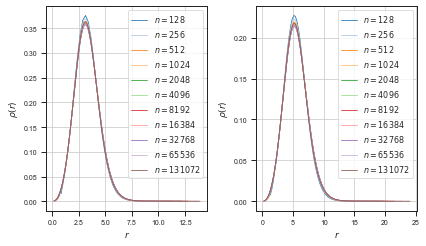

In [129]:

def rescale_haus(y, N, dH, s, x=None):
    if not x:
        x = np.arange(len(y))
    return [(x+s)*(N**(-1/dH)), y*(N**(1/dH))]

sns.set_palette(sns.color_palette("tab20"))

fig, [ax1, ax2] = plt.subplots(ncols=2, figsize=(6,3.5))

q = 1
dH = np.mean(dHs_dual)
s = dual_s
index = 0

#sizes = size_data[q]
sizes = [128, 256, 512,1024,2048,4096, 8192,16384, 32768, 65536, 131072]

for n in sizes:
    with SimDistanceAdvanced(q=q, n=n, name="distancemeasure2", run_id=0, combiner=9*10, index=index) as measurement:
        area = np.trapz(measurement["y"])
        p = measurement["y"]/area
        Sp = measurement["y_err"]/area
        #Sp = measurement["y"]/np.trapz(measurement["y"])     
        print(dH)   
        ax1.plot(*rescale_haus(y=p, N=n, dH=dH, s=s), label="$n = {}$".format(n))

    ax1.legend()
    #plt.title("Distance histogram/dual graph distance")
    ax1.grid()
    ax1.set_xlabel("$r$")
    ax1.set_ylabel(r"$\rho(r)$")


q = 1
dH = np.mean(dHs_edge)
s = edge_s
index = 1

#sizes = size_data[q]
sizes = [128, 256, 512,1024,2048,4096, 8192,16384, 32768, 65536, 131072]

for n in sizes:
    with SimDistanceAdvanced(q=q, n=n, name="distancemeasure2", run_id=0, combiner=9*10, index=index) as measurement:
        area = np.trapz(measurement["y"])
        p = measurement["y"]/area
        Sp = measurement["y_err"]/area
        #Sp = measurement["y"]/np.trapz(measurement["y"])     
        print(dH)   
        ax2.plot(*rescale_haus(y=p, N=n, dH=dH, s=s), label="$n = {}$".format(n))

    ax2.legend()
    #plt.title("Distance histogram/dual graph distance")
    ax2.grid()
    ax2.set_xlabel("$r$")
    ax2.set_ylabel(r"$\rho(r)$")

plt.tight_layout()

fig.savefig("docs/results/assets/finitesizescaledversionwithshift.pdf", bbox_inches='tight')


# V2 q = 0.2

[dual_s, edge_s] [2.653663251112135, 4.2356612057268075]
s = 2.653663251112135
sizes[-1]:  32768
p:  (176,)
0.09870734466731898
[5.17939425] [[0.00012295]]
0.08228612994868036
[4.24046208] [[7.15553818e-06]]
0.06494474574071812
[3.44475086] [[3.67505246e-05]]
0.052924560248779
[2.79983909] [[1.91121034e-05]]
0.042543582872016546
[2.27241434] [[8.72095815e-06]]
0.03469850309295459
[1.84882151] [[2.31793899e-06]]
0.028605944811924917
[1.5095071] [[7.31187461e-07]]
0.023245463477143655
[1.22233094] [[5.55605077e-07]]
0.01943996368412161
[1.00000187] [[4.63478437e-14]]
[3.37157162 3.35857255 3.36248054 3.36622989 3.37774158 3.38370065
 3.36657916 3.45265424]
popt= [ 3.34784000e+00  6.57497803e-01 -3.92948057e-48  1.49587354e+01] err= [7.07730668e-03 1.91582001e-03 4.51226578e-42 1.63717849e+05]
sizes[-1]:  32768
p:  (178,)
0.10003363502935421
[5.24885115] [[6.9114417e-05]]
0.08053251771749756
[4.27591166] [[1.07497408e-05]]
0.06600527257877381
[3.49111811] [[2.91922866e-06]]
0.054305221688

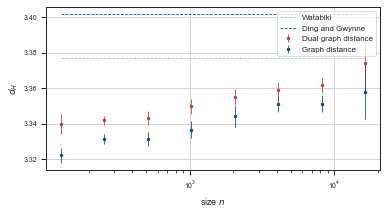

In [144]:

q = 0.2

sizes = size_data[q]

runs = list(range(9))#[0,1,2,3, 4, 5, 6]

combiner = 2

sizes = size_data[q]

[dual_s, edge_s] = get_dual_edge(combiner, runs, q, sizes)

print("[dual_s, edge_s]", [dual_s, edge_s])

results_dual = []
results_edge = []

plt.figure(figsize=(6,3))

index = 0
s = dual_s
dHs_dual = []
dHs_edge = []

dual_dH_fit = []
edge_dH_fit = []

print('s =', s)
#run_id = 0
for run_id in runs:
    #with SimDistance(q=q, n=sizes[-1], name="distancemeasure") as measurement:
    with SimDistanceAdvanced(q=q, n=sizes[-1], name="distancemeasure2", run_id=run_id, index=index) as measurement:

        print("sizes[-1]: ", sizes[-1])
        norm = np.sum(measurement["y"])
        p = measurement["y"]/norm
        Sp = measurement["y_err"]/norm
        #print(measurement)
        print("p: ", p.shape)

    x0 = np.arange(len(p))
    f0 = interpolate.interp1d(x0, p, kind='linear')

    #plt.errorbar(x0, f0(x0), Sp)
    #plt.show()

    def hausfit(x_s, k):
        rescale_y = 1/k
        global s
        global f0
        try:
            val = f0(k*(x_s + s) - s)
        except:
            val = 0
        return val/rescale_y

    ks = []
    #ss = []

    for n in sizes:
        #with SimDistance(q=q, n=n, name="distancemeasure") as measurement:
        with SimDistanceAdvanced(q=q, n=n, name="distancemeasure2", run_id=run_id, index=index) as measurement:
            area = np.trapz(measurement["y"])
            p = measurement["y"]/area
            Sp = measurement["y_err"]/area

            max_val = np.max(p)
            print(max_val)
            x = np.arange(len(p))
            Sp_ = Sp[p>max_val/5]
            p_ = p[p>max_val/5]
            x_ = x[p>max_val/5]
            
            popt, pcov = curve_fit(hausfit, x_, p_, sigma=Sp_, maxfev=100000)
            k = popt[0]
            #s = popt[1]

            ks.append(k)
            #ss.append(s)
            print(popt, pcov)



    n_ = np.array(sizes[:-1])
    k_ = np.array(ks[:-1])

    y = np.log(sizes[-1]/n_)/np.log(k_/ks[-1])

    print(y)

    results_dual.append(y)

    #results.append(y)

    def hausfitleadorder(n, d, a, b, delta, n0):
        return np.power(n/n0, -1/d)*(a+b*(n/n0)**-delta)

    hausfitleadorder = partial(hausfitleadorder, n0=n0)


    popt, pcov = curve_fit(hausfitleadorder, sizes, ks, maxfev=100000)#, bounds=[[0, 0, -0.5, 0], [10, 5, 0.5, 40]])
    err = np.sqrt(pcov.diagonal())
    print("popt=", popt, "err=", err)
    dual_dH_fit.append(popt)
    if err[0] < 1:
        dHs_dual.append(popt[0])
        
    else:
        print("fail fit")

    sizes = np.array(sizes)

index = 1
s = edge_s
print('s =', s)
#run_id = 0
for run_id in runs:
    #with SimDistance(q=q, n=sizes[-1], name="distancemeasure") as measurement:
    with SimDistanceAdvanced(q=q, n=sizes[-1], name="distancemeasure2", run_id=run_id, index=index) as measurement:

        print("sizes[-1]: ", sizes[-1])
        norm = np.sum(measurement["y"])
        p = measurement["y"]/norm
        Sp = measurement["y_err"]/norm
        #print(measurement)
        print("p: ", p.shape)

    x0 = np.arange(len(p))
    f0 = interpolate.interp1d(x0, p)

    #plt.errorbar(x0, f0(x0), Sp)
    #plt.show()

    def hausfit(x_s, k):
        rescale_y = 1/k
        global s
        global f0
        try:
            val = f0(k*(x_s + s) - s)
        except:
            val = 0
        return val/rescale_y

    ks = []
    #ss = []

    for n in sizes:
        #with SimDistance(q=q, n=n, name="distancemeasure") as measurement:
        with SimDistanceAdvanced(q=q, n=n, name="distancemeasure2", run_id=run_id, index=index) as measurement:
            area = np.trapz(measurement["y"])
            p = measurement["y"]/area
            Sp = measurement["y_err"]/area

            max_val = np.max(p)
            print(max_val)
            x = np.arange(len(p))
            Sp_ = Sp[p>max_val/5]
            p_ = p[p>max_val/5]
            x_ = x[p>max_val/5]
            
            popt, pcov = curve_fit(hausfit, x_, p_, sigma=Sp_, maxfev=100000)
            k = popt[0]
            #s = popt[1]

            ks.append(k)
            #ss.append(s)
            print(popt, pcov)



    n_ = np.array(sizes[:-1])
    k_ = np.array(ks[:-1])

    

    y = np.log(sizes[-1]/n_)/np.log(k_/ks[-1])

    print(y)

    results_edge.append(y)

    def hausfitleadorder(n, d, a, b, delta, n0):
        return np.power(n/n0, -1/d)*(a+b*(n/n0)**-delta)

    hausfitleadorder = partial(hausfitleadorder, n0=n0)


    popt, pcov = curve_fit(hausfitleadorder, sizes, ks, maxfev=100000)#, bounds=[[0, 0, -0.5, 0], [10, 5, 0.5, 40]])
    err = np.sqrt(pcov.diagonal())
    print("popt=", popt, "err=", err)
    edge_dH_fit.append(popt)
    if err[0] < 1:
        dHs_edge.append(popt[0])
        
    else:
        print("fail fit")

#print("mean s:", np.mean(ss))

results_dual = np.array(results_dual)
avgy_dual = np.mean(results_dual, axis=0)

results_edge = np.array(results_edge)
avgy_edge = np.mean(results_edge, axis=0)

yerr_dual = [np.sqrt(jackknife_var(row, np.mean)) for row in results_dual.T]
plt.errorbar(n_, avgy_dual, yerr=yerr_dual, color=colors['rbprimarycolor'], label="Dual graph distance", fmt='.')

yerr_edge = [np.sqrt(jackknife_var(row, np.mean)) for row in results_edge.T]
plt.errorbar(n_, avgy_edge, yerr=yerr_edge, color=colors['rblinkcolor'], label="Graph distance", fmt='.')



conj_hausdorff_dim = conjectured_hausdorff(central_charge(q))
conj_hausdorff_dim_DG = conjectured_hausdorff_DG(central_charge(q))



plt.hlines(conj_hausdorff_dim, np.min(n_), np.max(n_), color=colors['rbbluee'], label="Watabiki", linestyle='--')
plt.hlines(conj_hausdorff_dim_DG, np.min(n_), np.max(n_), label="Ding and Gwynne", color=colors['rblinkcolor'], linestyle='--')


plt.legend()
print("conjectured dH =", conj_hausdorff_dim)
print("conjectured_DG dH =", conj_hausdorff_dim_DG)
#plt.title("" + "$d_H$ (conjectured)" + "= ${}$".format(conj_hausdorff_dim))
plt.xscale("log")
plt.ylabel("$d_H$")
plt.xlabel("size $n$")
plt.grid()

dH_mean = np.mean(y)

print("average, dH", dH_mean)

print(dHs_dual, dHs_edge)



dual_dH_fit = np.array(dual_dH_fit)

print(dual_dH_fit)

dHs_dual = np.array(dHs_dual)
dHs_edge = np.array(dHs_edge)

dHs_dual_err = np.sqrt(jackknife_var(dHs_dual, np.mean))
dHs_edge_err = np.sqrt(jackknife_var(dHs_edge, np.mean))

#print("dHs_dual_err", dHs_dual_err)
print(errornumtostr([np.mean(dHs_dual), dHs_dual_err]))
print(errornumtostr([np.mean(dHs_edge), dHs_edge_err]))


plt.savefig("docs/results/assets/hausdorfffitq02.pdf", bbox_inches='tight')


In [ ]:
edge_dH_fit

In [ ]:
def rescale_haus(y, N, dH, s, x=None):
    if not x:
        x = np.arange(len(y))
    return [(x+s)*(N**(-1/dH))-s, y*(N**(1/dH))]

sns.set_palette(sns.color_palette("tab20"))

plt.figure(figsize=(6,4))

q = 1
dH = 3.58

#sizes = size_data[q]
sizes = [4096, 8192,16384, 32768, 65536, 131072]

for n in sizes:
    with SimDistance(q=q, n=n, name="distancemeasure") as measurement:
        p = measurement["y"]/np.trapz(measurement["y"])
        #Sp = measurement["y"]/np.trapz(measurement["y"])        
        plt.plot(*rescale_haus(y=p, N=n, dH=dH, s=s), label="$n = {}$".format(n))

    plt.legend()
    #plt.title("Distance histogram/dual graph distance")
    plt.xlabel("$r$")
    plt.ylabel("$N \\cdot \\rho_N(r)$")

#plt.savefig("docs/results/assets/finitesizescaledversion.pdf", bbox_inches='tight')


In [ ]:
def rescale_haus(y, N, dH, x=None):
    if not x:
        x = np.arange(len(y))
    return [x*(N**(-1/dH)), y*(N**(1/dH))]

sns.set_palette(sns.color_palette("tab20"))

plt.figure(figsize=(6,4))

q = 1
dH = 3.56

sizes = size_data[q]
#sizes = [4096, 8192,16384, 32768, 65536,]

for n in sizes:
    with SimDistance(q=q, n=n, name="distancemeasure") as measurement:
        p = measurement["y"]/np.trapz(measurement["y"])
        #Sp = measurement["y"]/np.trapz(measurement["y"])        
        plt.plot(*rescale_haus(y=p, N=n, dH=dH), label="$n = {}$".format(n))

    plt.legend()
    #plt.title("Distance histogram/dual graph distance")
    plt.xlabel("$r$")
    plt.ylabel("$N \\cdot \\rho_N(r)$")

plt.savefig("docs/results/assets/finitesizescaledversion.pdf", bbox_inches='tight')


In [ ]:
def rescale_haus(y, N, dH, x=None):
    if not x:
        x = np.arange(len(y))
    return [x*(N**(-1/dH)), y*(N**(1/dH))]

sns.set_palette(sns.color_palette("tab20"))

plt.figure(figsize=(6,4))

q = 1
dH = 3.56

sizes = size_data[q]
sizes = [4096, 8192,16384, 32768, 65536, 131072]

for n in sizes:
    with SimDistance(q=q, n=n, name="distancemeasure") as measurement:
        p = measurement["y"]/np.trapz(measurement["y"])
        #Sp = measurement["y"]/np.trapz(measurement["y"])        
        plt.plot(*rescale_haus(y=p, N=n, dH=dH), label="$n = {}$".format(n))

    plt.legend()
    #plt.title("Distance histogram/dual graph distance")
    plt.xlabel("$r$")
    plt.ylabel("$N \\cdot \\rho_N(r)$")

plt.savefig("docs/results/assets/finitesizescaledversionselection.pdf", bbox_inches='tight')


In [ ]:
def rescale_haus(y, N, dH, x=None):
    if not x:
        x = np.arange(len(y))
    return [x*(N**(-1/dH)), y*(N**(1/dH))]

sns.set_palette(sns.color_palette("tab20"))

plt.figure(figsize=(6,4))

q = 1
dH = 3.56

sizes = size_data[q]
#sizes = [4096, 8192,16384, 32768, 65536,]

for n in sizes:
    with SimDistance(q=q, n=n, name="distancemeasure") as measurement:
        p = measurement["y"]/np.trapz(measurement["y"])
        #Sp = measurement["y"]/np.trapz(measurement["y"])        
        plt.plot(*rescale_haus(y=p, N=n, dH=dH), label="$n = {}$".format(n))

    plt.legend()
    #plt.title("Distance histogram/dual graph distance")
    plt.xlabel("$r$")
    plt.ylabel("$N \\cdot \\rho_N(r)$")

#plt.savefig("docs/results/assets/finitesizescaledversion.pdf", bbox_inches='tight')


In [ ]:
q = 1
n = 262144

with SimDistanceAdvanced(q=q, n=n, name="distancemeasure", run_id=0) as measurement:
    print(measurement)
